In [70]:
from random import seed
from random import randint
seed(3)
sk=[]
for _ in range(10):
    value = randint(1, 100)
    sk.append(value)


seed(2)
# generate some integers
vs=[]
for _ in range(10):
    value = randint(1, 100)
    vs.append(value)


skill=[]
visibility=[]
for i in range(10):
    b=round(sk[i]/sum(sk),5)
    a=round(vs[i]/sum(vs),5)
    skill.append(b)
    skill.sort(reverse=True)
    visibility.append(a)
    visibility.sort(reverse=True)
print('skill:',skill,'\n')
print('visibilita:',visibility)

skill: [0.14835, 0.14286, 0.13919, 0.13736, 0.12821, 0.11172, 0.08791, 0.05678, 0.03114, 0.01648] 

visibilita: [0.21991, 0.19907, 0.18056, 0.1088, 0.09259, 0.07639, 0.05093, 0.02778, 0.02546, 0.01852]


In [71]:
import pandas as pd
from sklearn.utils import shuffle
import math

### elenco dei candidati e della relativa skill

candidates= [('candidato1','0.14835'),('candidato2',' 0.14286'),('candidato3','0.13919'),('candidato4','0.13736'),
             ('candidato5','0.12821'),('candidato6','0.11172'),('candidato7','0.08791'),('candidato8','0.05678'),
             ('candidato9','0.03114'),('candidato10','0.01648')]


    
#creo una funzione per le permutazioni    
permutation_list=[]  

# funzione per generare permutazioni

for i in range (1000):
        z=shuffle(candidates)
        if z in permutation_list:
            z=shuffle(candidates)
        else:
            permutation_list.append(z)
        permutation_df=pd.DataFrame(permutation_list)


#doppio ciclo for per calcolo del welfare e della fairness

R = []
F = []
for i in range(1000):
    somma = 0
    calcolo = 0
    for j in range(0, (10)):
        #print("Elemento: ", perm_df[j][i+1][1])
        #print("Skill: ", float(visibilita[j]))
        skl=float(permutation_df[j][i][1])
        #print("Skill*candidato: ",float(skl*visibilita[j]))
        somma = somma + float(skl*visibility[j])
        calcolo= calcolo+float(skl*math.log(skl/visibility[j],2))
    F.append(calcolo)
    R.append(somma)


        
n_perm_df = permutation_df.assign(welfare=R,fairness=F) 


#FUNZIONE PER CALCOLO DELLO SCORE
A= []
for i in range (0,1000):
    contatore= 0
    for c in range(0,1000):
        if n_perm_df.iloc[[i]]['welfare'][i]>n_perm_df.iloc[[c]]['welfare'][c] and n_perm_df.iloc[[i]]['fairness'][i]<n_perm_df.iloc[[c]]['fairness'][c]:
            contatore= contatore+1
    A.append(contatore/999)

n_perm_df= n_perm_df.assign(score=A)




for i in range(1000):
    for j in range (10):
        permutation_list[i][j]=permutation_list[i][j][0]
        
df_complete=pd.DataFrame(permutation_list)
df_complete=df_complete.assign(welfare=R)
df_complete=df_complete.assign(fairness=F)
df_complete=df_complete.assign(score=A)




        
df_complete

,0,1,2,3,4,5,6,7,8,9,welfare,fairness,score
0,candidato7,candidato9,candidato5,candidato2,candidato1,candidato6,candidato3,candidato10,candidato4,candidato8,0.098590,0.570590,0.420420
1,candidato9,candidato6,candidato10,candidato2,candidato1,candidato5,candidato3,candidato4,candidato8,candidato7,0.085115,0.796815,0.098098
2,candidato7,candidato6,candidato4,candidato1,candidato8,candidato3,candidato5,candidato9,candidato2,candidato10,0.109742,0.411800,0.774775
3,candidato5,candidato9,candidato4,candidato8,candidato6,candidato7,candidato3,candidato10,candidato1,candidato2,0.096402,0.745237,0.290290
4,candidato4,candidato2,candidato1,candidato8,candidato5,candidato6,candidato9,candidato3,candidato10,candidato7,0.119515,0.353200,0.943944
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,candidato9,candidato4,candidato8,candidato5,candidato7,candidato10,candidato6,candidato3,candidato1,candidato2,0.083772,0.979708,0.040040
996,candidato6,candidato9,candidato10,candidato1,candidato3,candidato2,candidato4,candidato5,candidato8,candidato7,0.087315,0.770558,0.137137
997,candidato2,candidato5,candidato10,candidato4,candidato3,candidato6,candidato9,candidato7,candidato1,candidato8,0.105138,0.555107,0.623624
998,candidato7,candidato10,candidato1,candidato3,candidato2,candidato8,candidato6,candidato5,candidato4,candidato9,0.095433,0.663819,0.313313


In [72]:
df_complete.to_csv('Dataset_AIML_python.csv', index=False)

In [1]:
import pandas as pd
df = pd.read_csv('Dataset_AIML_python.csv')
df

,0,1,2,3,4,5,6,7,8,9,welfare,fairness,score
0,candidato7,candidato9,candidato5,candidato2,candidato1,candidato6,candidato3,candidato10,candidato4,candidato8,0.098590,0.570590,0.420420
1,candidato9,candidato6,candidato10,candidato2,candidato1,candidato5,candidato3,candidato4,candidato8,candidato7,0.085115,0.796815,0.098098
2,candidato7,candidato6,candidato4,candidato1,candidato8,candidato3,candidato5,candidato9,candidato2,candidato10,0.109742,0.411800,0.774775
3,candidato5,candidato9,candidato4,candidato8,candidato6,candidato7,candidato3,candidato10,candidato1,candidato2,0.096402,0.745237,0.290290
4,candidato4,candidato2,candidato1,candidato8,candidato5,candidato6,candidato9,candidato3,candidato10,candidato7,0.119515,0.353200,0.943944
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,candidato9,candidato4,candidato8,candidato5,candidato7,candidato10,candidato6,candidato3,candidato1,candidato2,0.083772,0.979708,0.040040
996,candidato6,candidato9,candidato10,candidato1,candidato3,candidato2,candidato4,candidato5,candidato8,candidato7,0.087315,0.770558,0.137137
997,candidato2,candidato5,candidato10,candidato4,candidato3,candidato6,candidato9,candidato7,candidato1,candidato8,0.105138,0.555107,0.623624
998,candidato7,candidato10,candidato1,candidato3,candidato2,candidato8,candidato6,candidato5,candidato4,candidato9,0.095433,0.663819,0.313313


In [2]:
df=df.drop(['welfare', 'fairness'], axis = 1)

In [3]:
df_dummies =pd.get_dummies(df.loc[:, df.columns != 'score'] )
df_dummies=df_dummies.assign(score= df.loc[:, df.columns == 'score'])
df_dummies

,0_candidato1,0_candidato10,0_candidato2,0_candidato3,0_candidato4,0_candidato5,0_candidato6,0_candidato7,0_candidato8,0_candidato9,...,9_candidato10,9_candidato2,9_candidato3,9_candidato4,9_candidato5,9_candidato6,9_candidato7,9_candidato8,9_candidato9,score
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0.420420
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0.098098
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0.774775
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.290290
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.943944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0.040040
996,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.137137
997,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.623624
998,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0.313313


In [4]:
import statsmodels.api as sm
X = df_dummies.loc[:, df_dummies.columns != 'score'] 
y = df_dummies.loc[:, df_dummies.columns == 'score']
model = sm.OLS(y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     349.0
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:37:35   Log-Likelihood:                 1561.1
No. Observations:                1000   AIC:                            -2958.
Df Residuals:                     918   BIC:                            -2556.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
0_candidato1      0.1785      0.005     39.045

minimo -0.18262564530376402 
primo quartile: -0.03442298090754536 
mediana: -0.0007155884098664078 
media: 1.6547874182037958e-16 
terzo quartile: 0.03258481299727567 
massimo: 0.2810845685913222


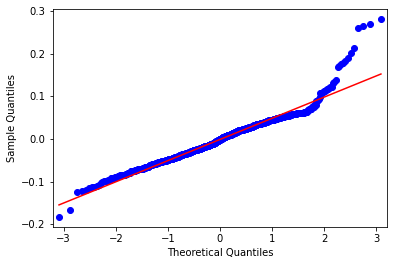

In [7]:
import matplotlib.pyplot as plt
import numpy as np
res = model.resid
print('minimo',min(res),
    '\nprimo quartile:',np.percentile(res,25),
     '\nmediana:',np.median(res),
     '\nmedia:',np.mean(res),
     '\nterzo quartile:',np.percentile(res,75),
     '\nmassimo:',max(res))

fig = sm.qqplot(res,line='q')
plt.show()